In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/talksrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [2]:
import nanoscope as nano

In [3]:
cd '~/Dropbox/AFM'

/Users/nik/Dropbox/AFM


In [4]:
ls

Basic Theory/          Settings/              peptide_fiber_project/
Manuals/               microscope_data/       saved_images/


In [5]:
cd microscope_data/

/Users/nik/Dropbox/AFM/microscope_data


In [6]:
filelist = glob.glob('*072810_1*')

In [7]:
filelist

['ngh_072810_1.000',
 'ngh_072810_1.001',
 'ngh_072810_1.002',
 'ngh_072810_1.003',
 'ngh_072810_1.004',
 'ngh_072810_1.005',
 'ngh_072810_1.006',
 'ngh_072810_1.007']

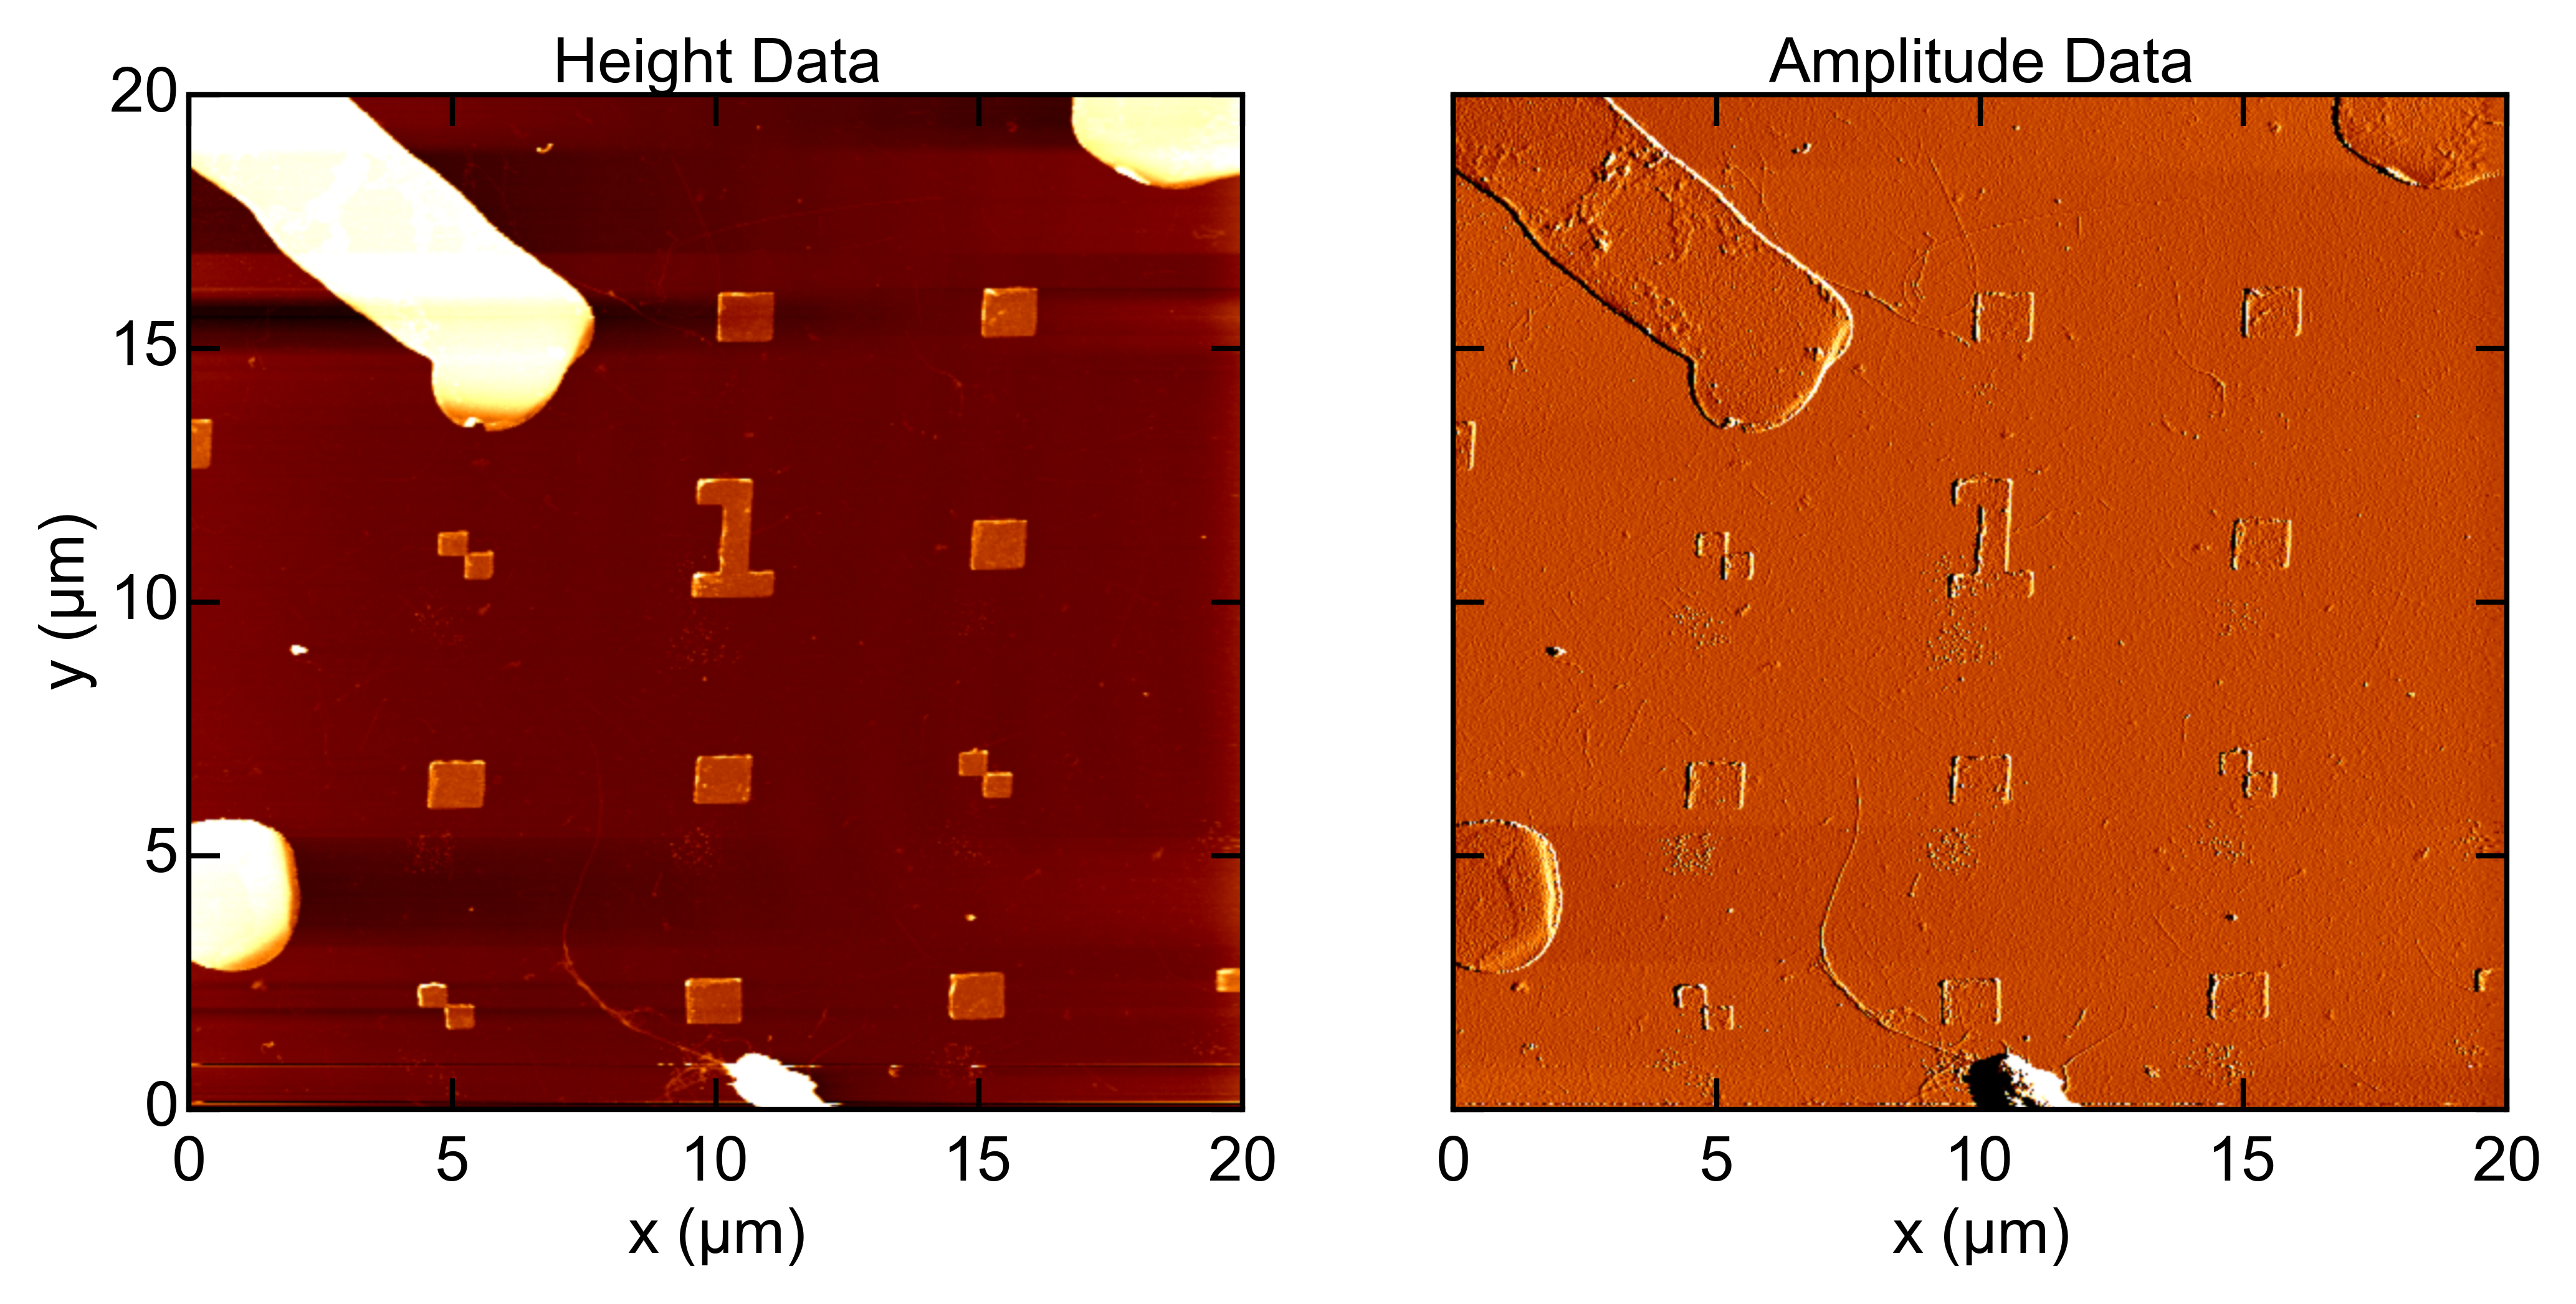

In [13]:
f = filelist [1]
a = nano.AfmData(f)
for i, name in enumerate(a.channel_names):
        if name == 'Height':
            height = a.get_channel_data(i)[::-1] #flip image
            row, col = a.shape[i]
            height_mask = nano.create_height_mask(a, [0,95])
            height = nano.flatten(height, a.shape[i], order = 1, data_mask=height_mask)
        else:
            amp = a.get_channel_data(i)[::-1] #flip image
            amp = nano.flatten(amp, a.shape[i], order = 1)
            amin, amax = nano.set_colorscale(amp)
            
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (16,7))
ax1.imshow(height, cmap=plt.cm.afmhot, aspect='auto', interpolation='gaussian', 
           extent = a.extent, vmin = -20, vmax = 80)
ax2.imshow(amp, cmap=plt.cm.afmhot, aspect='auto', interpolation='gaussian', 
           extent = a.extent, vmin = amin, vmax = amax)
ax1.set_ylabel('y ($\mu$m)')
ax1.set_xlabel('x ($\mu$m)')
ax2.set_xlabel('x ($\mu$m)')
ax1.set_title('Height Data')
ax2.set_title('Amplitude Data')

# fig.savefig('/Users/nik/Dropbox/Repos/thesis/figures/chapter3/single_cnt_au_markers.pdf')

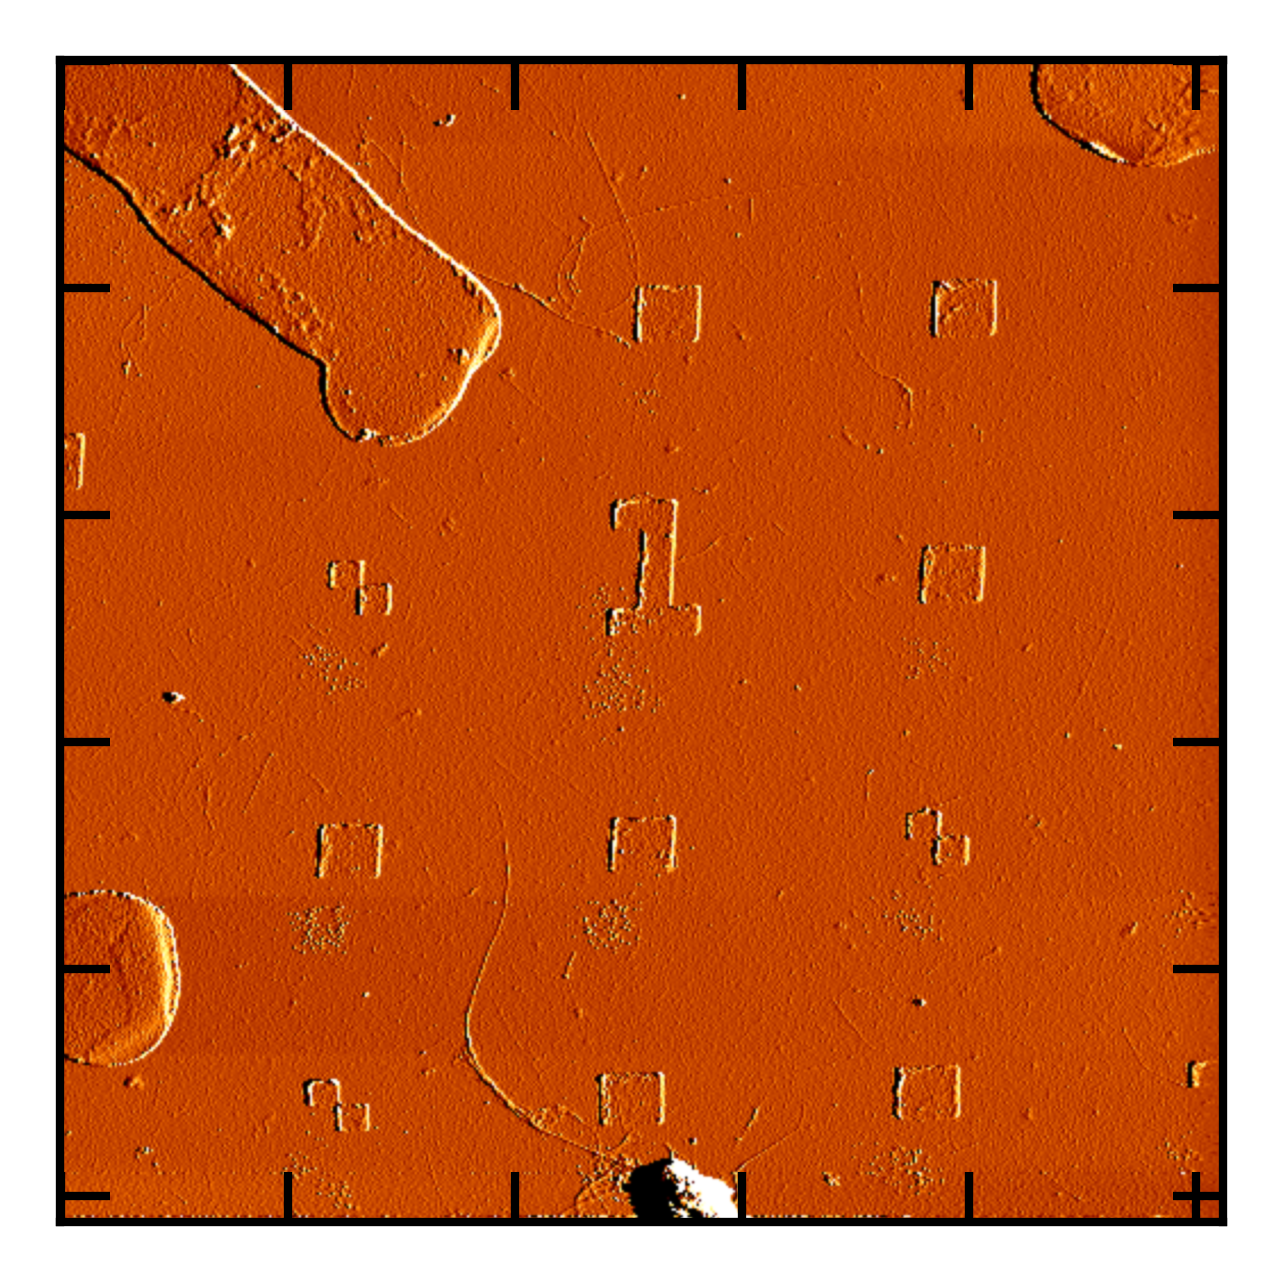

In [12]:
fig, ax = plt.subplots(figsize = (5,5))

ax.imshow(amp, cmap=plt.cm.afmhot, aspect='auto', interpolation='gaussian', 
           vmin = amin, vmax = amax)
# ax1.set_ylabel('y ($\mu$m)')
# ax1.set_xlabel('x ($\mu$m)')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

fig.savefig('/Users/nik/Dropbox/Talks/DEFENSE/figures/afm_amplitude.png')